In [47]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [48]:
string = 'hello pytorch. how long can a rnn cell remember? show me your limit!'
chars = "abcdefghijklmnopqrstuvwxyz ?!.,:;01"
char_list = [i for i in chars]
char_len = len(char_list)
print(char_len)

35


In [49]:
def string_to_onehot(string):
  start = np.zeros(shape = char_len,dtype = int)
  end = np.zeros(shape=char_len,dtype=int)
  start[-2] = 1
  end[-1] = 1
  for i in string:
    idx = char_list.index(i)
    zero = np.zeros(shape = char_len,dtype = int)
    zero[idx] = 1
    start = np.vstack([start,zero])
  output = np.vstack([start,end])
  return output

In [50]:
def onehot_to_word(onehot_1):
  onehot = torch.Tensor.numpy(onehot_1)
  return char_list[onehot.argmax()]

In [51]:
batch_size = 1
seq_len = 1
num_layers = 3
input_size = char_len
hidden_size = 35
lr = 0.01
num_epochs = 1000
one_hot = torch.from_numpy(string_to_onehot(string)).type_as(torch.FloatTensor())

print(one_hot.size())

torch.Size([70, 35])


In [52]:
class RNN(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers):
    super(RNN,self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_size,hidden_size,num_layers)

  def forward(self,input_,hidden,cell):
    output,(hidden,cell) = self.lstm(input_,(hidden,cell))
    return output,hidden,cell
    
  def init_hidden_cell(self):
    hidden = torch.zeros(num_layers,batch_size,hidden_size)
    cell = torch.zeros(num_layers,batch_size,hidden_size)
    return hidden,cell
  
rnn = RNN(input_size,hidden_size,num_layers)

In [53]:
loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(),lr=lr)

In [54]:
j = 0
input_data = one_hot[j:j+seq_len].view(seq_len,batch_size,input_size)
print(input_data.size())

hidden,cell = rnn.init_hidden_cell()
print(hidden.size(),cell.size())

output,hidden,cell = rnn(input_data,hidden,cell)
print(output.size(),hidden.size(),cell.size())

torch.Size([1, 1, 35])
torch.Size([3, 1, 35]) torch.Size([3, 1, 35])
torch.Size([1, 1, 35]) torch.Size([3, 1, 35]) torch.Size([3, 1, 35])


In [55]:
loss_arr = []
unroll_len = one_hot.size()[0]//seq_len-1
for i in range(num_epochs):
  hidden,cell = rnn.init_hidden_cell()
  loss = 0
  
  for j in range(unroll_len):
    input_data = one_hot[j:j+seq_len].view(seq_len,batch_size,input_size)
    label = one_hot[j+1:j+seq_len+1].view(seq_len,batch_size,input_size)

    optimizer.zero_grad()

    output,hidden,cell = rnn(input_data,hidden,cell)
    loss += loss_func(output.view(1,-1),label.view(1,-1))
  
  loss.backward()
  optimizer.step()

  if i%100 == 0:
    print(loss)
    loss_arr.append(loss)

tensor(2.1665, grad_fn=<AddBackward0>)
tensor(0.0696, grad_fn=<AddBackward0>)
tensor(0.0090, grad_fn=<AddBackward0>)
tensor(0.0046, grad_fn=<AddBackward0>)
tensor(0.0031, grad_fn=<AddBackward0>)
tensor(0.0026, grad_fn=<AddBackward0>)
tensor(0.0024, grad_fn=<AddBackward0>)
tensor(0.0022, grad_fn=<AddBackward0>)
tensor(0.0021, grad_fn=<AddBackward0>)
tensor(0.0020, grad_fn=<AddBackward0>)


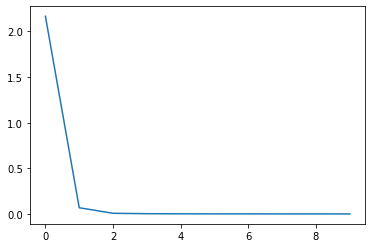

In [56]:
import matplotlib.pyplot as plt
plt.plot(loss_arr)

In [57]:
hidden,cell = rnn.init_hidden_cell()

for j in range(unroll_len-1):
    input_data = one_hot[j:j+1].view(1,batch_size,hidden_size) 
    label = one_hot[j+1:j+1+1].view(1,batch_size,hidden_size) 
    
    output, hidden, cell = rnn(input_data,hidden,cell)
    print(onehot_to_word(output.data),end="") 

hello pytorch. how long can a rnn cell remember? show me your limit!